In [56]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3803331/kaesang-psi-tidak-ingin-ikut-campur-urusan-gibran-dengan-pdip"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)



				Jakarta (ANTARA) - Ketua Partai Solidaritas Indonesia (PSI) Kaesang Pangarep mengatakan bahwa partainya tidak ingin ikut campur terkait urusan kakaknya yang sekaligus bakal calon wakil presiden dari Koalisi Indonesia Maju Gibran Rakabuming Raka di partainya.
Kaesang menanggapi pernyataan dari Ketua Bidang Kehormatan DPP PDIP Komarudin Watubun yang mengatakan bila partainya memecat Gibran Rakabuming Raka usai menjadi bacawapres dari Prabowo Subianto akan muncul narasi dizalimi.
"Ya balik lagi itu saya kembalikan lagi, itu urusan dapur partai lain, PSI tidak ikut campur tentang itu," kata Kaesang di Kantor DPP PSI, Jakarta Pusat, Rabu.
Namun, Kaesang siap menerima Gibran ke partainya bila Wali Kota Solo, Jawa Tengah, tersebut sudah tidak lagi menjadi kader PDIP.
"Oh iya terbuka sekali kan berkali-kali bilang kalau masuk ke sini sangat terbuka," ujar Kaesang.
Baca juga: Forum Komunikasi Santri Indonesia resmi gabung PSI
Baca juga: Ketum PSI kunjungi UMKM dan pengrajin sasando di Kupa

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
				Jakarta (ANTARA) - Ketua Partai Solidaritas Indonesia (PSI) Kaesang Pangarep mengatakan bahwa partainya tidak ingin ikut campur terkait urusan kakaknya yang sekaligus bakal calon wakil presiden dari Koalisi Indonesia Maju Gibran Rakabuming Raka di partainya.
antara: 0.1640
bahwa: 0.1883
bakal: 0.1883
calon: 0.1883
campur: 0.1640
dari: 0.1224
di: 0.1132
gibran: 0.1224
ikut: 0.1333
indonesia: 0.3279
ingin: 0.1883
jakarta: 0.1640
kaesang: 0.1224
kakaknya: 0.1883
ketua: 0.1224
koalisi: 0.1883
maju: 0.1883
mengatakan: 0.1640
pangarep: 0.1883
partai: 0.1640
partainya: 0.2934
presiden: 0.1640
psi: 0.1467
raka: 0.1640
rakabuming: 0.1640
sekaligus: 0.1883
solidaritas: 0.1883
terkait: 0.1640
tidak: 0.1333
urusan: 0.1640
wakil: 0.1883
yang: 0.1333

Kalimat 2: Kaesang menanggapi pernyataan dari Ketua Bidang Kehormatan DPP PDIP Komarudin Watubun yang mengatakan bila partainya memecat Gibran Rakabuming Raka usai menjadi bacawapres dari Prabowo Subianto akan muncul narasi dizalimi.
ak

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.2371


In [59]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.2371
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.2095
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.1283
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0198
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.1648
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0291
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0378
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0224
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0389
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0918
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0382
Cosine Similarity antara Kalimat 1 dan Kalimat 16: 0.0784
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.0392
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.1862
Cosine Similarity antara

In [60]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16
Kalimat 1,1.000000,0.237110,0.209541,0.128328,0.019762,0.164829,0.000000,0.029095,0.037764,0.022428,0.038855,0.000000,0.091813,0.000000,0.038205,0.078441
Kalimat 2,0.237110,1.000000,0.039182,0.186217,0.021654,0.087422,0.000000,0.017189,0.000000,0.049149,0.000000,0.000000,0.113759,0.000000,0.000000,0.114290
Kalimat 3,0.209541,0.039182,1.000000,0.104952,0.019357,0.111995,0.022577,0.026265,0.036989,0.000000,0.065470,0.105574,0.012763,0.101260,0.037421,0.000000
Kalimat 4,0.128328,0.186217,0.104952,1.000000,0.078052,0.047968,0.028132,0.016364,0.336173,0.080273,0.034157,0.058709,0.081761,0.030778,0.053999,0.084456
Kalimat 5,0.019762,0.021654,0.019357,0.078052,1.000000,0.000000,0.255319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 6,0.164829,0.087422,0.111995,0.047968,0.000000,1.000000,0.016466,0.103513,0.031242,0.218735,0.178588,0.000000,0.048619,0.018016,0.000000,0.039086
Kalimat 7,0.000000,0.000000,0.022577,0.028132,0.255319,0.016466,1.000000,0.044974,0.000000,0.029794,0.093876,0.044480,0.000000,0.129985,0.000000,0.000000
Kalimat 8,0.029095,0.017189,0.026265,0.016364,0.000000,0.103513,0.044974,1.000000,0.039540,0.017331,0.054607,0.025873,0.029606,0.075611,0.000000,0.000000
Kalimat 9,0.037764,0.000000,0.036989,0.336173,0.000000,0.031242,0.000000,0.039540,1.000000,0.000000,0.000000,0.122497,0.038427,0.000000,0.136414,0.000000
Kalimat 10,0.022428,0.049149,0.000000,0.080273,0.000000,0.218735,0.029794,0.017331,0.000000,1.000000,0.177016,0.000000,0.032787,0.032597,0.000000,0.057441


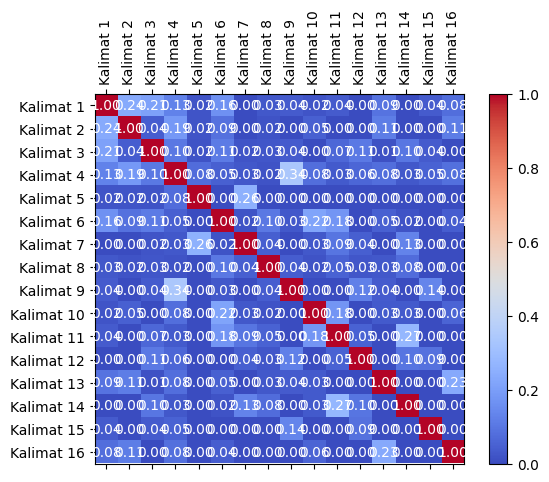

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


In [62]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 
				Jakarta (ANTARA) - Ketua Partai Solidaritas Indonesia (PSI) Kaesang Pangarep mengatakan bahwa partainya tidak ingin ikut campur terkait urusan kakaknya yang sekaligus bakal calon wakil presiden dari Koalisi Indonesia Maju Gibran Rakabuming Raka di partainya.: 22.2774
Closeness Centrality of Kaesang menanggapi pernyataan dari Ketua Bidang Kehormatan DPP PDIP Komarudin Watubun yang mengatakan bila partainya memecat Gibran Rakabuming Raka usai menjadi bacawapres dari Prabowo Subianto akan muncul narasi dizalimi.: 19.3663
Closeness Centrality of "Ya balik lagi itu saya kembalikan lagi, itu urusan dapur partai lain, PSI tidak ikut campur tentang itu," kata Kaesang di Kantor DPP PSI, Jakarta Pusat, Rabu.: 24.5204
Closeness Centrality of Namun, Kaesang siap menerima Gibran ke partainya bila Wali Kota Solo, Jawa Tengah, tersebut sudah tidak lagi menjadi kader PDIP.: 23.2067
Closeness Centrality of "Oh iya terbuka sekali kan berkali-kali bilang kalau masuk ke sini s

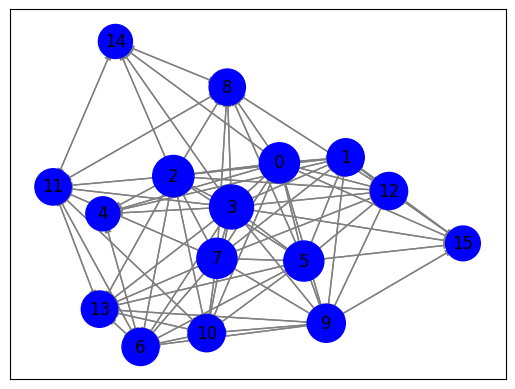

Closeness Centrality:
Node 0: 0.8333
Node 1: 0.7143
Node 2: 0.8824
Node 3: 1.0000
Node 4: 0.6000
Node 5: 0.8333
Node 6: 0.7143
Node 7: 0.8333
Node 8: 0.6818
Node 9: 0.7500
Node 10: 0.7143
Node 11: 0.6818
Node 12: 0.7143
Node 13: 0.6818
Node 14: 0.6000
Node 15: 0.6250


In [63]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")


In [65]:
# Cetak closeness centrality hanya untuk node yang memiliki closeness di atas treshold
threshold = 0.7
print("Closeness Centrality (di atas treshold):")
for node, closeness in closeness_centrality.items():
    if closeness > threshold:
        print(f"Node {node}: {closeness:.4f}")

Closeness Centrality (di atas treshold):
Node 0: 0.8333
Node 1: 0.7143
Node 2: 0.8824
Node 3: 1.0000
Node 5: 0.8333
Node 6: 0.7143
Node 7: 0.8333
Node 9: 0.7500
Node 10: 0.7143
Node 12: 0.7143
